# Dynamic Programming to find Optimal Path

Here we have an square area with hills and a grided road network. A person has to drive from point A to B on the network. The person comes from an esoteric cult where it is not allowed to drive your car towards west of south on sundays. Today is a sunday. So this person can only drive towards north or east.

At every moment, this person has to make a decision to either go north or east such that he reaches B and minimizes fuel consumption. Climbing a slope consumes fuel proportional to the height gained while driving down the slope does not consume any fuel.

This would be a classic Dynammic programming problem and I will walk you through the code to help this person find the optimal path. 

Once you have mastered this, then we will write code to find the optimal path for non sundays when the person is allowed to go in either of the 4 directions!

## Part 1: Sundays 

Follow the comments to understand the process. Don't get bogged down by the code. Understand the idea.

In [205]:
from math import exp
import numpy as np

# First we will write a function that takes 
# in a x,y coordinate on a map and returns the height of that point
# This is a function that draws 3 small hills 
# in a square region going from 0,0 to 10,10
@np.vectorize
def height(x,y):
    return 100*exp(
        -(((x-9)/3)**2+((y-9)/3)**2)) + 100*exp(
        -(((x-2)/3)**2+((y-2)/3)**2)) + 100*exp(
        -(((x-7)/3)**2+((y-2)/3)**2))

# Then we write a function that takes current x,y 
# and previous x,y and calculates the height gained
# If the height reduces, it returns 0
# This is a good cost function since, more the height 
# increase, more the fuel consumption
# but going down the slope takes 0 fuel
def cost(x,y,x_prev,y_prev):
    c = height(x,y)-height(x_prev,y_prev)
    return c if c>0 else 0

# This is the main function that calculates the 
# minimum cost as well as the optimal path to reach given x,y
def minimum_cost_path(x,y):
    # If x=0 and y=0, reaching this point is trivial 
    # and takes 0 fuel and optimal path is [[0,0]]
    # Just do not drive
    if (x==0 and y==0):
        return 0, [[0,0]]
    else:
        # But if both not 0...we have following cases
        if x>0 and y>0:
            # If both greater than 0, what are the points, 
            # from which a person can reach x,y?
            # Ans - since person can move only up or right, 
            # only points that can reach x,y are
            # (x-1,y) and (x,y-1)
            # so we first calculate cost of approaching left point (x-1,y)
            cost_from_left = minimum_cost_path(x-1,y)
            # Then we calculate cost of approaching bottom point (x,y-1)
            cost_from_below = minimum_cost_path(x,y-1)
            # cost1 = cost of approaching left point (x-1,y) 
            # + cost of going from (x-1,y) to (x,y)
            # cost2 = cost of approaching bottom point (x,y-1) 
            # + cost of going from (x,y-1) to (x,y)
            # return the minimum cost1 and cost2 as cost to approach (x,y)
            
            # cost of approaching left point (x-1,y) is calculated by 
            # recursively calling minimum_cost_path(x-1,y)
            
            if cost_from_below[0]+cost(x,y,x,y-1)<cost_from_left[0]+cost(x,y,x-1,y):
                return cost_from_below[0]+cost(x,y,x,y-1), cost_from_below[1]+[[x,y]]
            else:
                return cost_from_left[0]+cost(x,y,x-1,y), cost_from_left[1]+[[x,y]]
        elif x>0 and y==0:
            # If y=0, only way to approach (x,y) is from bottom
            mc = minimum_cost_path(x-1,y)
            return mc[0]+cost(x,y,x-1,y), mc[1]+[[x,y]]
        else:
            # If x=0, only way to approach (x,y) is from left
            mc = minimum_cost_path(x,y-1)
            return mc[0]+cost(x,y,x,y-1), mc[1]+[[x,y]]

# Call the function to calculate optimal path to point 10,10
cost_tenten, path_tenten = minimum_turn_path(10,10)

# Call the function to calculate optimal path to point 4,8
cost_foureight, path_foureight = minimum_turn_path(4,8)

# Print the optimal costs and paths. Ignore the mumbo jumbo
path_string = ""
for p in path_tenten:
    path_string += "("+str(p[0])+", "+str(p[1])+")-->"
path_string = path_string[:-3]
print("Minimum cost to reach 10,10 = {0}\n Optimal Path - {1}"
      .format(cost_tenten, path_string))
path_string = ""
print("\n")
for p in path_foureight:
    path_string += "("+str(p[0])+", "+str(p[1])+")-->"
path_string = path_string[:-3]
print("Minimum cost to reach 4,8 = {0}\n Optimal Path - {1}"
      .format(cost_foureight, path_string))

Minimum cost to reach 10,10 = 100.35381234337648
 Optimal Path - (0, 0)-->(0, 1)-->(0, 2)-->(0, 3)-->(0, 4)-->(0, 5)-->(1, 5)-->(2, 5)-->(3, 5)-->(4, 5)-->(5, 5)-->(6, 5)-->(7, 5)-->(8, 5)-->(8, 6)-->(8, 7)-->(9, 7)-->(10, 7)-->(10, 8)-->(10, 9)-->(10, 10)


Minimum cost to reach 4,8 = 29.38051878887093
 Optimal Path - (0, 0)-->(0, 1)-->(0, 2)-->(0, 3)-->(0, 4)-->(0, 5)-->(0, 6)-->(0, 7)-->(0, 8)-->(1, 8)-->(2, 8)-->(3, 8)-->(4, 8)


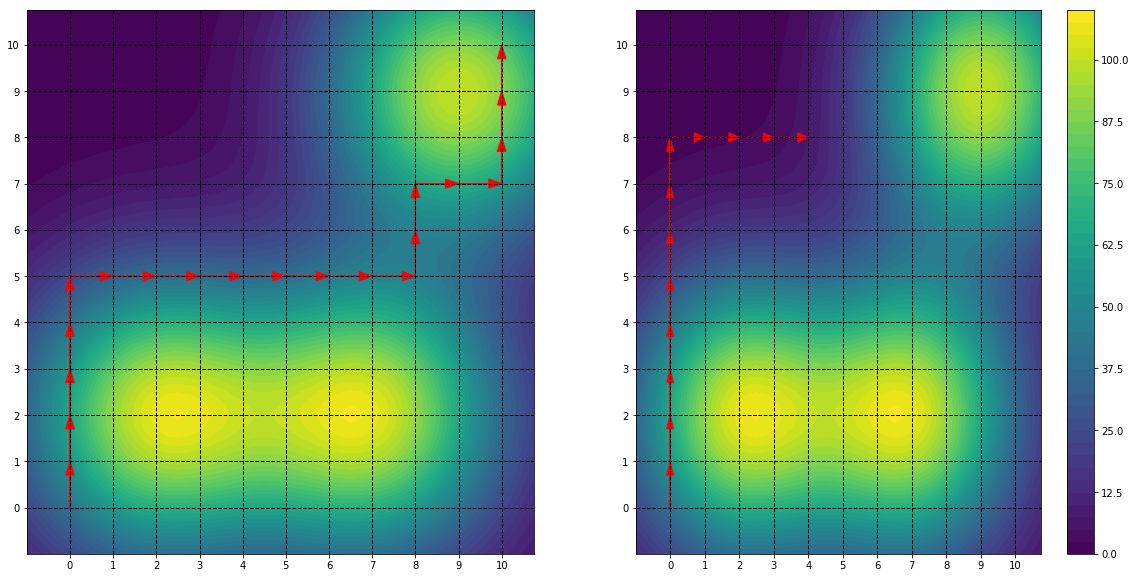

In [206]:
# Lets visualize it via plots
# You can ignore the code and focus on 
# plot and get an intuitive feel

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].grid(color='k', linestyle='--', linewidth=1)
ax[0].set_xticks(np.arange(0, 11, 1))
ax[0].set_yticks(np.arange(0, 11, 1))
for i in range(1,len(path_tenten)):
    ax[0].arrow(path_tenten[i-1][0], path_tenten[i-1][1], 
                path_tenten[i][0]-path_tenten[i-1][0], 
                path_tenten[i][1]-path_tenten[i-1][1], 
                head_width=0.2, head_length=0.3, fc='r', 
                ec='r', length_includes_head=True)
ax[0].scatter(x, y)

ax[1].grid(color='k', linestyle='--', linewidth=1)
ax[1].set_xticks(np.arange(0, 11, 1))
ax[1].set_yticks(np.arange(0, 11, 1))
for i in range(1,len(path_foureight)):
    ax[1].arrow(path_foureight[i-1][0], path_foureight[i-1][1], 
                path_foureight[i][0]-path_foureight[i-1][0],
                path_foureight[i][1]-path_foureight[i-1][1], 
                head_width=0.2, head_length=0.3, fc='r', 
                ec='r', length_includes_head=True)
ax[1].scatter(x, y)
ax[1].scatter(10,10,marker="o",cmap="r", s=300)
ax[0].scatter(10,10,marker="o",cmap="r", s=300)

# Our 2-dimensional distribution will be over variables X and Y
delta = 0.25
xg = np.arange(-1, 11, delta)
yg = np.arange(-1, 11, delta)
Xg, Yg = np.meshgrid(xg, yg)
Z = height(Xg,Yg)
CS = ax[0].contourf(Xg, Yg, Z, 50)
CS = ax[1].contourf(Xg, Yg, Z, 50)
cbar = plt.colorbar(CS)

plt.show()

## Why is it so slow?

## How do we speed it up?

We will use a technique called Memoization, where we store the values we have previously calculated

I have marked in comments the change from previous code

In [208]:
# This is the main function that calculates the 
#minimum cost as well as the optimal path to reach given x,y

#############################
## Create a global storage ##
## and initialize all #######
## values to -1 #############
#############################
storage_for_computed_answers = [[-1 for _ in range(11)] 
                                for _ in range(11)]

def minimum_cost_path(x,y):
    # If x=0 and y=0, reaching this point is trivial 
    # and takes 0 fuel and optimal path is [[0,0]]
    # Just do not drive
    if (x==0 and y==0):
        return 0, [[0,0]]
    else:
        # But if both not 0...we have following cases
        if x>0 and y>0:
            # If both greater than 0, what are the points, from 
            # which a person can reach x,y?
            # Ans - since person can move only up or right, 
            # only points that can reach x,y are
            # (x-1,y) and (x,y-1)
            # so we first calculate cost of approaching 
            # left point (x-1,y)
            
            #############################
            ## Check if answer ##########
            ## already stored in ########
            ## global storage. If not ###
            ## Calculate and store ######
            #############################
            if storage_for_computed_answers[x-1][y]==-1:
                storage_for_computed_answers[x-1][y] = minimum_cost_path(x-1,y)
            cost_from_left = storage_for_computed_answers[x-1][y]
            # Then we calculate cost of approaching 
            # bottom point (x,y-1)
            
            #############################
            ## Check if answer ##########
            ## already stored in ########
            ## global storage. If not ###
            ## Calculate and store ######
            #############################
            if storage_for_computed_answers[x][y-1]==-1:
                storage_for_computed_answers[x][y-1] = minimum_cost_path(x,y-1)
            cost_from_below = storage_for_computed_answers[x][y-1]
            # cost1 = cost of approaching left point (x-1,y) + 
            # cost of going from (x-1,y) to (x,y)
            # cost2 = cost of approaching bottom point (x,y-1) + 
            # cost of going from (x,y-1) to (x,y)
            # return the minimum cost1 and cost2 as cost 
            # to approach (x,y)
            
            # cost of approaching left point (x-1,y) is 
            # calculated by 
            # recursively calling minimum_cost_path(x-1,y)
            
            if cost_from_below[0]+cost(x,y,x,y-1)<cost_from_left[0]+cost(x,y,x-1,y):
                return cost_from_below[0]+cost(x,y,x,y-1), cost_from_below[1]+[[x,y]]
            else:
                return cost_from_left[0]+cost(x,y,x-1,y), cost_from_left[1]+[[x,y]]
        elif x>0 and y==0:
            #############################
            ## Check if answer ##########
            ## already stored in ########
            ## global storage. If not ###
            ## Calculate and store ######
            #############################
            if storage_for_computed_answers[x-1][y]==-1:
                storage_for_computed_answers[x-1][y] = minimum_cost_path(x-1,y)
            cost_from_left = storage_for_computed_answers[x-1][y]
            return cost_from_left[0]+cost(x,y,x-1,y), cost_from_left[1]+[[x,y]]
        else:
            #############################
            ## Check if answer ##########
            ## already stored in ########
            ## global storage. If not ###
            ## Calculate and store ######
            #############################
            if storage_for_computed_answers[x][y-1]==-1:
                storage_for_computed_answers[x][y-1] = minimum_cost_path(x,y-1)
            cost_from_below = storage_for_computed_answers[x][y-1]
            return cost_from_below[0]+cost(x,y,x,y-1), cost_from_below[1]+[[x,y]]

# Call the function to calculate optimal path to point 10,10
cost_tenten, path_tenten = minimum_cost_path(10,10)

# Call the function to calculate optimal path to point 4,8
cost_foureight, path_foureight = minimum_cost_path(4,8)

# Print the optimal costs and paths. Ignore the mumbo jumbo
path_string = ""
for p in path_tenten:
    path_string += "("+str(p[0])+", "+str(p[1])+")-->"
path_string = path_string[:-3]
print("Minimum cost to reach 10,10 = {0}\n Optimal Path - {1}".
      format(cost, cost_tenten))
path_string = ""
print("\n")
for p in path_foureight:
    path_string += "("+str(p[0])+", "+str(p[1])+")-->"
path_string = path_string[:-3]
print("Minimum cost to reach 4,8 = {0}\n Optimal Path - {1}".
      format(cost, cost_foureight))

Minimum cost to reach 10,10 = <function cost at 0x105d33d90>
 Optimal Path - 100.35381234337648


Minimum cost to reach 4,8 = <function cost at 0x105d33d90>
 Optimal Path - 29.38051878887093


Lets again plot and visualize. Notice that this time answers were calculated faster than before

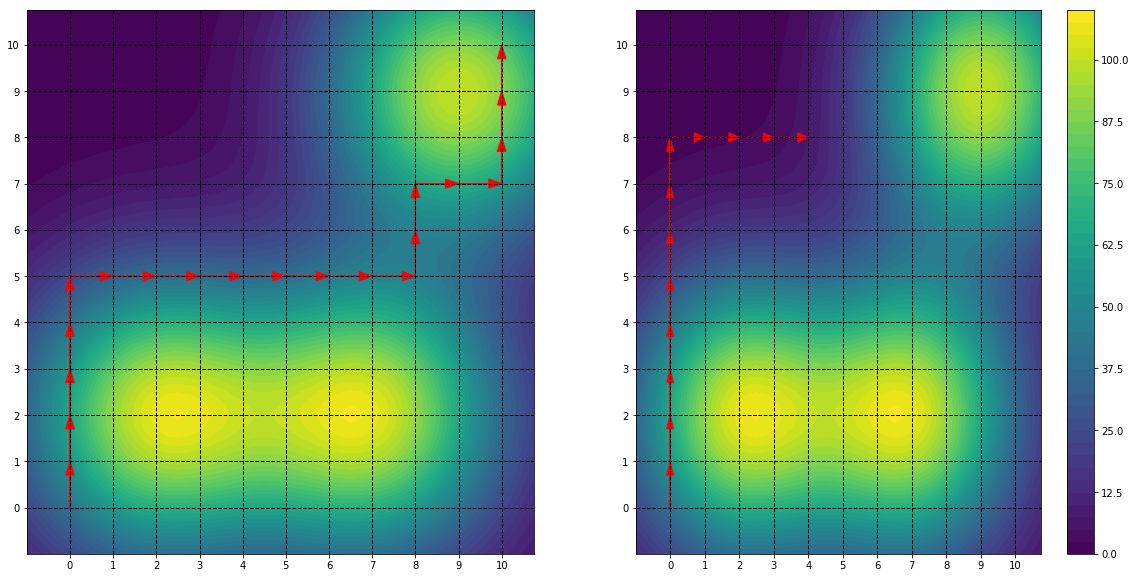

In [209]:
# Lets visualize it via plots
# You can ignore the code and focus on plot and 
# get an intuitive feel

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].grid(color='k', linestyle='--', linewidth=1)
ax[0].set_xticks(np.arange(0, 11, 1))
ax[0].set_yticks(np.arange(0, 11, 1))
for i in range(1,len(path_tenten)):
    ax[0].arrow(path_tenten[i-1][0], path_tenten[i-1][1], 
                path_tenten[i][0]-path_tenten[i-1][0], 
                path_tenten[i][1]-path_tenten[i-1][1], 
                head_width=0.2, head_length=0.3, fc='r', 
                ec='r', length_includes_head=True)
ax[0].scatter(x, y)

ax[1].grid(color='k', linestyle='--', linewidth=1)
ax[1].set_xticks(np.arange(0, 11, 1))
ax[1].set_yticks(np.arange(0, 11, 1))
for i in range(1,len(path_foureight)):
    ax[1].arrow(path_foureight[i-1][0], path_foureight[i-1][1], 
                path_foureight[i][0]-path_foureight[i-1][0], 
                path_foureight[i][1]-path_foureight[i-1][1], 
                head_width=0.2, head_length=0.3, fc='r', 
                ec='r', length_includes_head=True)
ax[1].scatter(x, y)
ax[1].scatter(10,10,marker="o",cmap="r", s=300)
ax[0].scatter(10,10,marker="o",cmap="r", s=300)

# Our 2-dimensional distribution will be over variables X and Y
delta = 0.25
xg = np.arange(-1, 11, delta)
yg = np.arange(-1, 11, delta)
Xg, Yg = np.meshgrid(xg, yg)
Z = height(Xg,Yg)
CS = ax[0].contourf(Xg, Yg, Z, 50)
CS = ax[1].contourf(Xg, Yg, Z, 50)
cbar = plt.colorbar(CS)

plt.show()

## Part 2: Weekdays

Try to guess what change will you make to calculate optimal path on weekdays? You know that the person can now travel north, south, east and west.

Hint: Now there are 4 ways to approach every point

I have marked places where you need to add corresponding code with bold comments. Try doing it!

In [218]:
# This is the main function that calculates the minimum 
# cost as well as the optimal path to reach given x,y

#############################
## Create a global storage ##
## and initialize all #######
## values to -1 #############
#############################
storage_for_computed_answers = [[-1 for _ in range(11)] for _ in range(11)]

def minimum_cost_path(x,y,top_corner):
    # If x=0 and y=0, reaching this point is trivial 
    # and takes 0 fuel and optimal path is [[0,0]]
    # Just do not drive
    if (x==0 and y==0):
        return 0, [[0,0]]
    else:
        # But if both not 0...we have following cases
        if x>0 and y>0:
            if x==top_corner[0] and y<top_corner[1]:
                # There are 3 ways to approach. 
                # This one is already wirtten for you
                if storage_for_computed_answers[x-1][y]==-1:
                    storage_for_computed_answers[x-1][y] = minimum_cost_path(x-1,y,top_corner)
                cost_from_left = storage_for_computed_answers[x-1][y] + cost(x,y,x-1,y)
                
                if storage_for_computed_answers[x][y+1]==-1:
                    storage_for_computed_answers[x][y+1] = minimum_cost_path(x,y+1,top_corner)
                cost_from_top = storage_for_computed_answers[x][y+1] + cost(x,y,x,y+1)
                
                if storage_for_computed_answers[x][y-1]==-1:
                    storage_for_computed_answers[x][y-1] = minimum_cost_path(x,y-1,top_corner)
                cost_from_bottom = storage_for_computed_answers[x][y-1] + cost(x,y,x,y-1)
                
                list_of_cost_and_paths = [cost_from_left, cost_from_top, cost_from_bottom]
                list_of_costs = [e[0] for e in list_of_cost_and_paths]
                idx = np.argmin(list_of_costs)
                
                return list_of_cost_and_paths[idx][0], list_of_cost_and_paths[idx][1]+[[x,y]]
                
            elif y==top_corner[1] and x<top_corner[0]:
                # There are 3 ways to approach
                if storage_for_computed_answers[x-1][y]==-1:
                    storage_for_computed_answers[x-1][y] = minimum_cost_path(x-1,y,top_corner)
                cost_from_left = storage_for_computed_answers[x-1][y] + cost(x,y,x-1,y)
                
                if storage_for_computed_answers[x+1][y]==-1:
                    storage_for_computed_answers[x+1][y] = minimum_cost_path(x+1,y,top_corner)
                cost_from_right = storage_for_computed_answers[x+1][y] + cost(x,y,x+1,y)
                
                if storage_for_computed_answers[x][y-1]==-1:
                    storage_for_computed_answers[x][y-1] = minimum_cost_path(x,y-1,top_corner)
                cost_from_bottom = storage_for_computed_answers[x][y-1] + cost(x,y,x,y-1)
                
                list_of_cost_and_paths = [cost_from_left, cost_from_right, cost_from_bottom]
                list_of_costs = [e[0] for e in list_of_cost_and_paths]
                idx = np.argmin(list_of_costs)
                
                return list_of_cost_and_paths[idx][0], list_of_cost_and_paths[idx][1]+[[x,y]]
                
            elif x==top_corner[0] and y==top_corner[1]:
                # There are 2 ways to approach\
                if storage_for_computed_answers[x-1][y]==-1:
                    storage_for_computed_answers[x-1][y] = minimum_cost_path(x-1,y,top_corner)
                cost_from_left = storage_for_computed_answers[x-1][y] + cost(x,y,x-1,y)
                
                if storage_for_computed_answers[x][y-1]==-1:
                    storage_for_computed_answers[x][y-1] = minimum_cost_path(x,y-1,top_corner)
                cost_from_bottom = storage_for_computed_answers[x][y-1] + cost(x,y,x,y-1)
                
                list_of_cost_and_paths = [cost_from_left, cost_from_bottom]
                list_of_costs = [e[0] for e in list_of_cost_and_paths]
                idx = np.argmin(list_of_costs)
                
                return list_of_cost_and_paths[idx][0], list_of_cost_and_paths[idx][1]+[[x,y]]
                
            else: # Both <10 and >0
                # There are 4 ways to approach
                if storage_for_computed_answers[x-1][y]==-1:
                    storage_for_computed_answers[x-1][y] = minimum_cost_path(x-1,y,top_corner)
                cost_from_left = storage_for_computed_answers[x-1][y] + cost(x,y,x-1,y)
                
                if storage_for_computed_answers[x+1][y]==-1:
                    storage_for_computed_answers[x+1][y] = minimum_cost_path(x+1,y,top_corner)
                cost_from_right = storage_for_computed_answers[x+1][y] + cost(x,y,x+1,y)
                
                if storage_for_computed_answers[x][y+1]==-1:
                    storage_for_computed_answers[x][y+1] = minimum_cost_path(x,y+1,top_corner)
                cost_from_top = storage_for_computed_answers[x][y+1] + cost(x,y,x,y+1)
                
                if storage_for_computed_answers[x][y-1]==-1:
                    storage_for_computed_answers[x][y-1] = minimum_cost_path(x,y-1,top_corner)
                cost_from_bottom = storage_for_computed_answers[x][y-1] + cost(x,y,x,y-1)
                
                list_of_cost_and_paths = [cost_from_left, cost_from_right, 
                                          cost_from_top, cost_from_bottom]
                list_of_costs = [e[0] for e in list_of_cost_and_paths]
                idx = np.argmin(list_of_costs)
                
                return list_of_cost_and_paths[idx][0], list_of_cost_and_paths[idx][1]+[[x,y]]
                
        elif x>0 and y==0:
            # There are 3 ways to approach
            if storage_for_computed_answers[x-1][y]==-1:
                storage_for_computed_answers[x-1][y] = minimum_cost_path(x-1,y,top_corner)
            cost_from_left = storage_for_computed_answers[x-1][y] + cost(x,y,x-1,y)

            if storage_for_computed_answers[x+1][y]==-1:
                storage_for_computed_answers[x+1][y] = minimum_cost_path(x+1,y,top_corner)
            cost_from_right = storage_for_computed_answers[x+1][y] + cost(x,y,x+1,y)

            if storage_for_computed_answers[x][y+1]==-1:
                storage_for_computed_answers[x][y+1] = minimum_cost_path(x,y+1,top_corner)
            cost_from_top = storage_for_computed_answers[x][y+1] + cost(x,y,x,y+1)

            list_of_cost_and_paths = [cost_from_left, cost_from_right, cost_from_top]
            list_of_costs = [e[0] for e in list_of_cost_and_paths]
            idx = np.argmin(list_of_costs)

            return list_of_cost_and_paths[idx][0], list_of_cost_and_paths[idx][1]+[[x,y]]
        else:
            # There are 3 ways to approach
            if storage_for_computed_answers[x+1][y]==-1:
                storage_for_computed_answers[x+1][y] = minimum_cost_path(x+1,y,top_corner)
            cost_from_right = storage_for_computed_answers[x+1][y] + cost(x,y,x+1,y)

            if storage_for_computed_answers[x][y+1]==-1:
                storage_for_computed_answers[x][y+1] = minimum_cost_path(x,y+1,top_corner)
            cost_from_top = storage_for_computed_answers[x][y+1] + cost(x,y,x,y+1)
            
            if storage_for_computed_answers[x][y-1]==-1:
                storage_for_computed_answers[x][y-1] = minimum_cost_path(x,y-1,top_corner)
            cost_from_bottom = storage_for_computed_answers[x][y-1] + cost(x,y,x,y-1)

            list_of_cost_and_paths = [cost_from_bottom, cost_from_right, cost_from_top]
            list_of_costs = [e[0] for e in list_of_cost_and_paths]
            idx = np.argmin(list_of_costs)

            return list_of_cost_and_paths[idx][0], list_of_cost_and_paths[idx][1]+[[x,y]]

# THIS HAS BEEN COMMENTED OUT BEAUSE WHEN YOU RUN THIS, ALTHOUGH LOGIC IS RIGHT
# IT WILL THROW AN ERROR, READ NEXT CELL

# Call the function to calculate optimal path to point 10,10
cost_tenten, path_tenten = minimum_cost_path(10,10,(10,10))

# Call the function to calculate optimal path to point 4,8
cost_foureight, path_foureight = minimum_cost_path(4,8,(4,8))

# Print the optimal costs and paths. Ignore the mumbo jumbo
path_string = ""
for p in path_tenten:
    path_string += "("+str(p[0])+", "+str(p[1])+")-->"
path_string = path_string[:-3]
print("Minimum cost to reach 10,10 = {0}\n Optimal Path - {1}".format(cost, cost_tenten))
path_string = ""
print("\n")
for p in path_foureight:
    path_string += "("+str(p[0])+", "+str(p[1])+")-->"
path_string = path_string[:-3]
print("Minimum cost to reach 4,8 = {0}\n Optimal Path - {1}".format(cost, cost_foureight))

RecursionError: maximum recursion depth exceeded in comparison

## What happened? 

The code throws an error that says maximum recursion depth exceeded! Why does this happen?

Hint: Paths can have cycles that go indefinitely and therefore number of path to reach a point are infinite!
    
How is this problem solved? This is a traditional problem of shortest path and can be solved by graph based algorithms like breadth first search. Do read them if interested. See how those algorithms tackle this problem and distinguish it from our dynamic programming approach

